# Introduction

<p>Car accidents are a major concern for public safety, leading to injuries and fatalities. In this machine learning project, we aim to predict the severity of car accidents in the United States using a comprehensive dataset covering 49 states from February 2016 to December 2021. With approximately 2.8 million accident records collected from multiple APIs, we will preprocess the data, explore patterns, select relevant features, train machine learning models, and deploy a predictive tool to aid emergency services and improve road safety.</p>

# About Data

# ***About Dataset:***
#### ***Source: Kaggle***
#### ***Dataset_Name: US_car_accidents_2016-2021***
#### ***Source_link:***
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
#### ***Size 1.5GB***
#### ***Description:***
This dataset contains the number of car accidents in the US from Feb 2016 to 2021.
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

### ***Features:***
### We have 47 features in this dataset, but we will discuss only few of them which are more useful.
- useful columns
#### 1. Severity:
- hows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).	No
#### 2. Start_Lat
-	Shows latitude in GPS coordinate of the start point.	No
#### 3. Start_Lng
-	Shows longitude in GPS coordinate of the start point.	No
#### 5. Distance(mi)
-	The length of the road extent affected by the accident.	No
#### 6. City
-	Shows the city in address field.	Yes
#### 7. State
-	Shows the state in address field.	Yes
#### 8. Country
-	Shows the country in address field.	Yes
#### 9. Temperature(F)
-	Shows the temperature (in Fahrenheit).	Yes
#### 10. Humidity(%)
-	Shows the humidity (in percentage).	Yes
#### 11. Visibility(mi)
-	Shows visibility (in miles).	
#### 13. Wind_Direction
-	Shows wind direction.	
#### 14. Weather_Condition
-	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	Yes

In [1]:
#import pandas as pd
#pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split


## ***Reading data***

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('C:\\Users\\loulo\\Data Mining\\Datasets\\US_Accidents_Dec21_updated.csv')

# Split the data into training and testing sets
train_data, df = train_test_split(data, test_size=0.3, random_state=42)

# Access the testing data



## ***Rows & Columns***

In [5]:
print(df.shape[0])
print(df.shape[1])

853603
47


In [3]:
df.head(3)  # Or perform any other operations with the testing data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1786514,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
270133,A-270134,2,2021-12-12 06:17:38,2021-12-12 09:02:47,47.461591,-92.901602,47.477781,-92.902962,1.120,Construction on US-169 near COUNTY HWY-5 Drive...,...,False,False,False,False,False,False,Night,Night,Night,Day
2689946,A-2689947,2,2018-02-12 07:34:42,2018-02-12 13:34:42,37.694424,-122.103225,37.694424,-122.103225,0.000,At 163rd Ave/164th Ave/Carolyn St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## ***Information about data***

In [4]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   523349
Street                        0
Side                          0
City                         38
County                        0
State                         0
Zipcode                     399
Country                       0
Timezone                   1074
Airport_Code               2839
Weather_Timestamp         15298
Temperature(F)            20872
Wind_Chill(F)            141016
Humidity(%)               22057
Pressure(in)              17852
Visibility(mi)            21311
Wind_Direction            22245
Wind_Speed(mph)           47650
Precipitation(in)        164897
Weather_Condition         21301
Amenity                       0
Bump    

## ***Statisical Information***

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,853603.000000,853603.000000,853603.000000,853603.000000,853603.000000,853603.000000,330254.000000,832731.000000,712587.000000,831546.000000,835751.000000,832292.000000,805953.000000,688706.000000
mean,2.137238,36.243838,-97.135938,36.243974,-97.135679,0.702821,8052.084586,61.839895,59.717661,64.358788,29.473238,9.098514,7.400662,0.007242
std,0.478284,5.360947,18.330440,5.361041,18.330253,1.578609,15504.126569,18.618471,21.144364,22.870182,1.042904,2.711820,5.425949,0.108343
min,1.000000,24.570087,-124.548074,24.570110,-124.545748,0.000000,1.000000,-89.000000,-89.000000,1.000000,2.990000,0.000000,0.000000,0.000000
25%,2.000000,33.451510,-118.041731,33.452880,-118.041762,0.051000,1266.000000,50.000000,46.000000,48.000000,29.320000,10.000000,3.500000,0.000000
50%,2.000000,36.104340,-92.434670,36.104042,-92.431470,0.243000,4009.000000,64.000000,63.000000,67.000000,29.820000,10.000000,7.000000,0.000000
75%,2.000000,40.157542,-80.372318,40.157671,-80.372823,0.764000,9533.000000,76.000000,76.000000,83.000000,30.010000,10.000000,10.000000,0.000000
max,4.000000,49.000580,-67.403551,49.075000,-67.403550,155.186000,961061.000000,196.000000,196.000000,100.000000,56.310000,130.000000,518.000000,24.000000


### ***Length of Numerical data***


In [14]:
#numeric data in dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.head())
len(numeric_df.columns)

         Severity  Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
1786514         2  28.257513  -81.436229  28.260315  -81.437122         0.201   
1441159         2  30.499671  -91.141074  30.502041  -91.141152         0.164   
472661          2  28.450381  -81.399122  28.449707  -81.401108         0.129   
1057214         2  33.962013 -118.231992  33.957410 -118.229918         0.340   
2362362         2  33.977722 -118.075771  33.977722 -118.075771         0.000   

          Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
1786514   1682.0            51.0           51.0         41.0         30.13   
1441159   5098.0            54.0           54.0         97.0         30.11   
472661    1631.0            66.0           66.0         60.0         30.05   
1057214   8404.0            63.0           63.0         65.0         29.77   
2362362  10882.0            70.0           70.0         31.0         30.20   

         Visibility(mi)  Wind_Speed(mph)  Pr

14

### ***Length of Categorical data***

In [15]:
# categorical data in dataframe
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.head())
len(categorical_df.columns)

                  Start_Time             End_Time             Street Side  \
1786514  2020-12-01 12:03:00  2020-12-02 00:09:22   Pleasant Hill Rd    L   
1441159  2021-11-02 03:16:00  2021-11-02 04:33:30       Hollywood St    R   
472661   2021-12-23 17:45:18  2021-12-23 21:10:39       Sand Lake Rd    R   
1057214  2021-10-19 17:39:00  2021-10-19 19:40:34       S Alameda St    L   
2362362  2020-01-06 10:14:00  2020-01-06 11:27:36        Saragosa St    R   

                City            County State     Zipcode Country    Timezone  \
1786514    Kissimmee           Osceola    FL  34746-3954      US  US/Eastern   
1441159  Baton Rouge  East Baton Rouge    LA  70805-1830      US  US/Central   
472661       Orlando            Orange    FL       32809      US  US/Eastern   
1057214  Los Angeles       Los Angeles    CA  90001-4112      US  US/Pacific   
2362362     Whittier       Los Angeles    CA  90606-2159      US  US/Pacific   

        Airport_Code    Weather_Timestamp Wind_Direction

18

# Exploratory data analysis 

## Histogram of the Distribution of Accidents by State

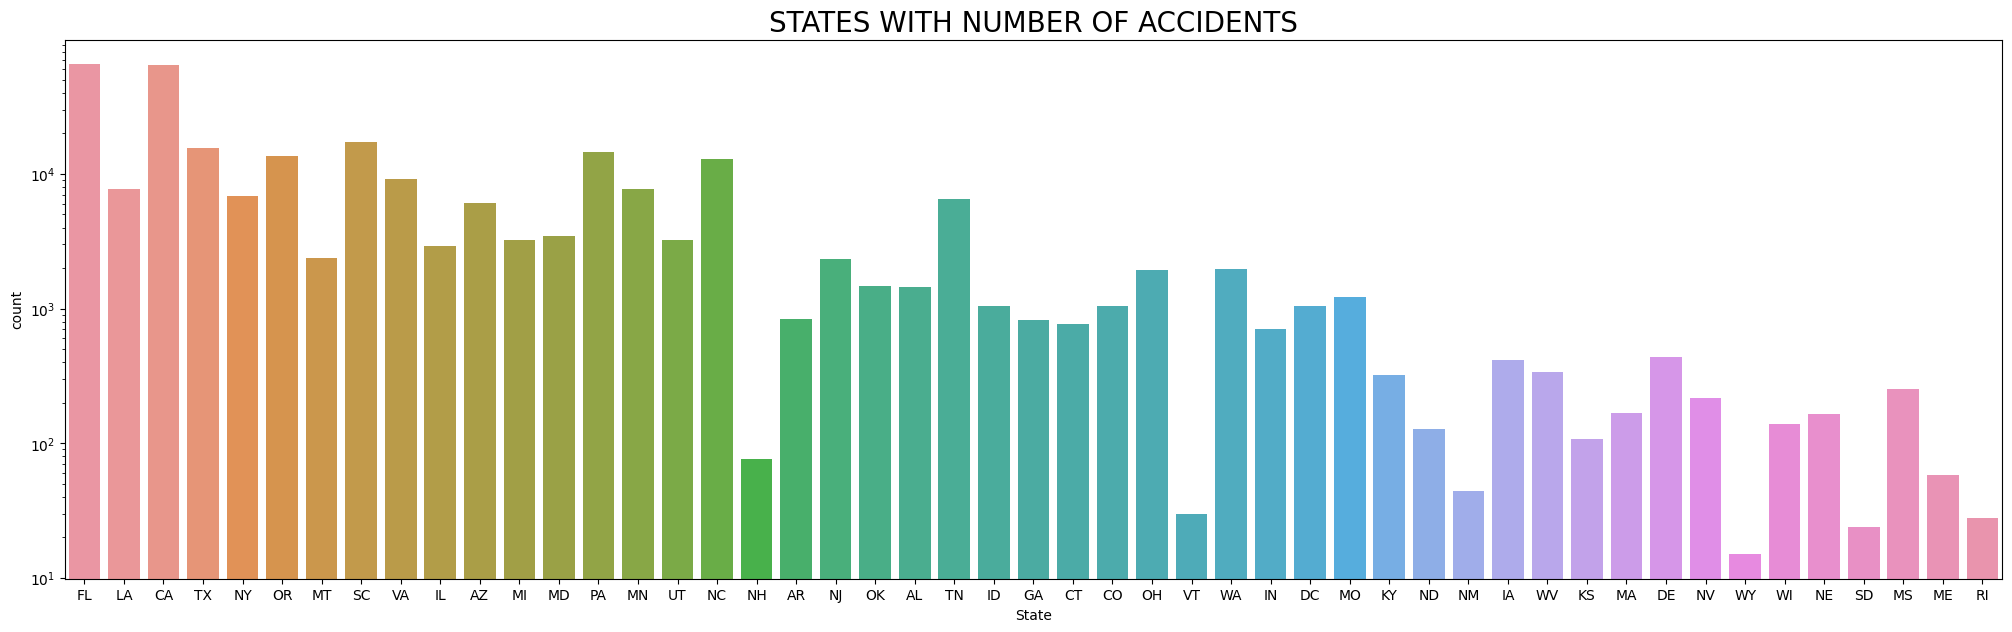

In [16]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

## Top 10 Cities with the Highest Number of Accidents

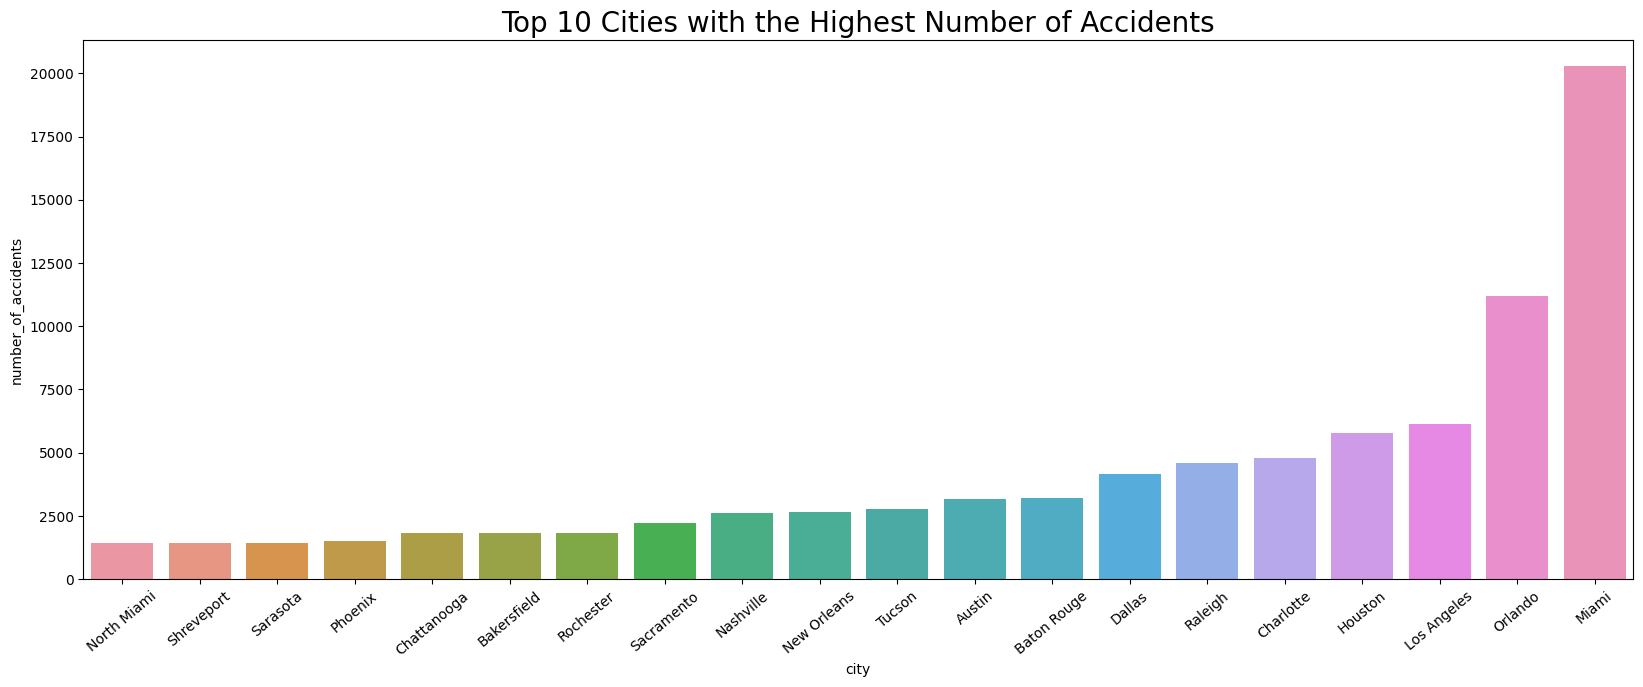

In [18]:
top_cities = df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns = ["city", "number_of_accidents"]

plt.figure(figsize=(20, 7))
sns.barplot(x="city", y="number_of_accidents", data=top_cities)
plt.title("Top 10 Cities with the Highest Number of Accidents", fontsize=20)
plt.xticks(rotation=40)
plt.show()

## Top 20 Weather Conditions for Accidents by Severity Level

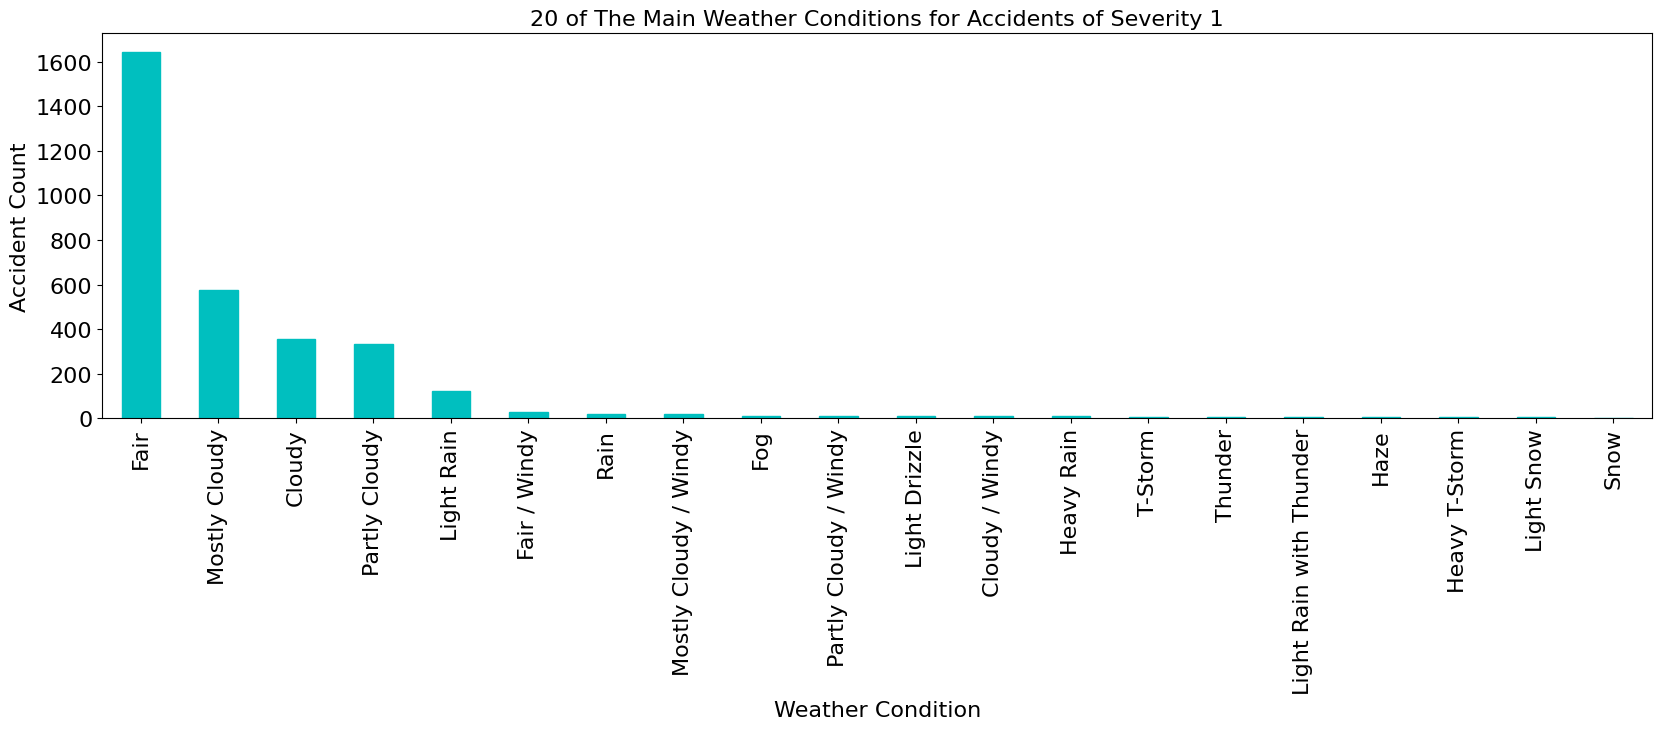

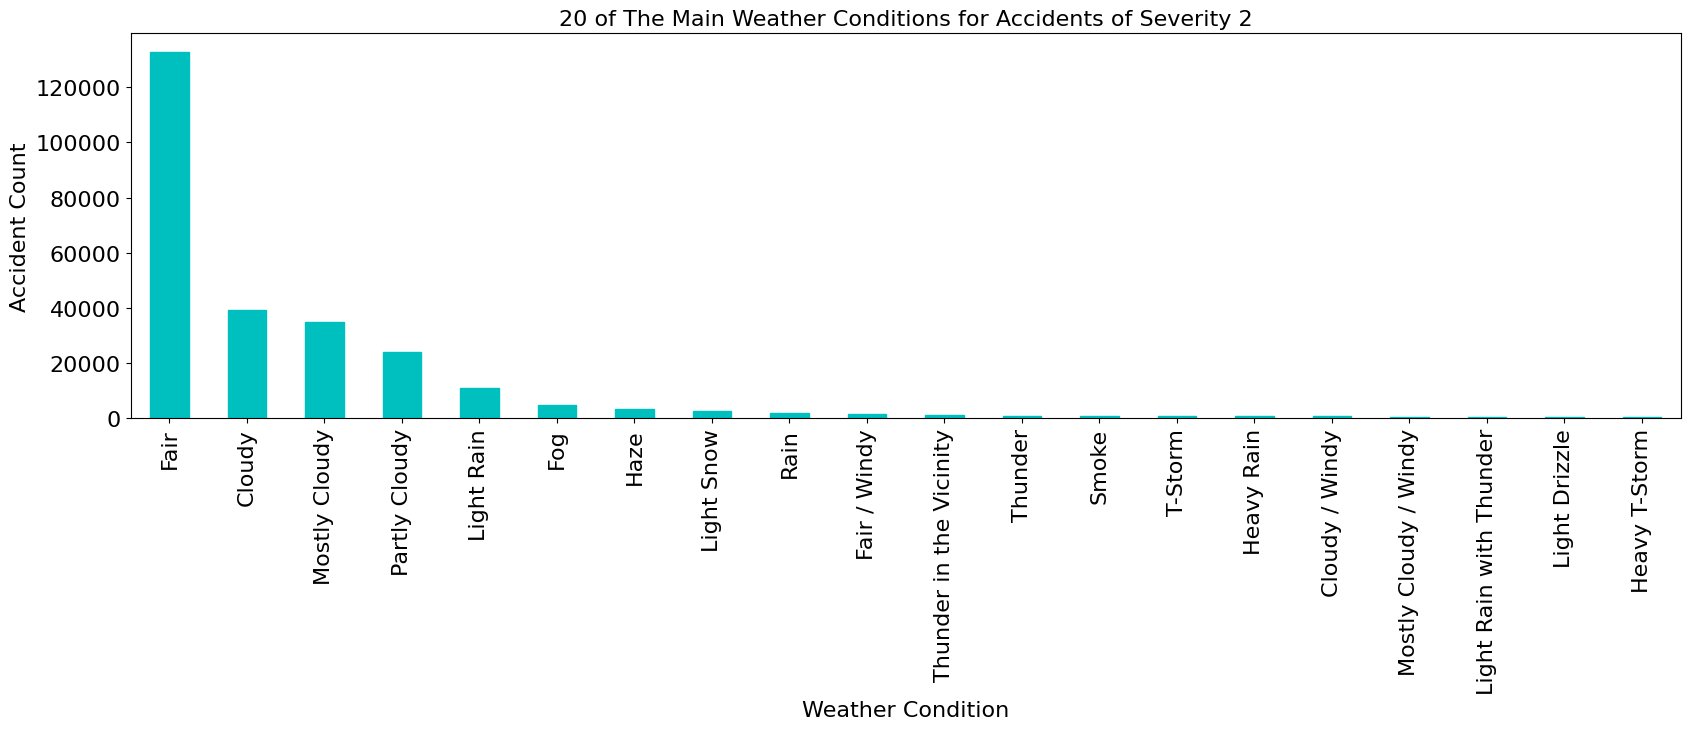

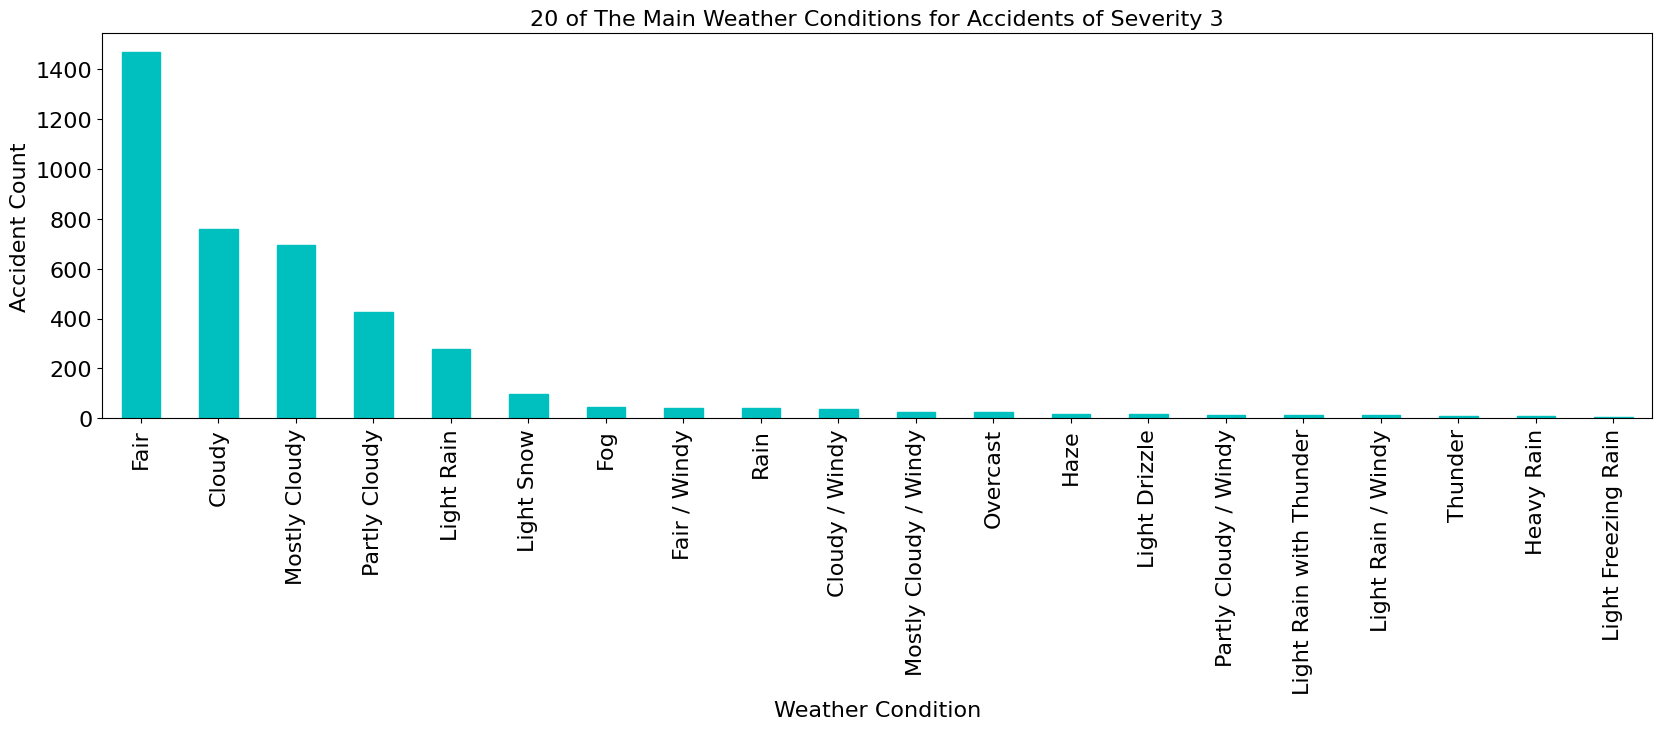

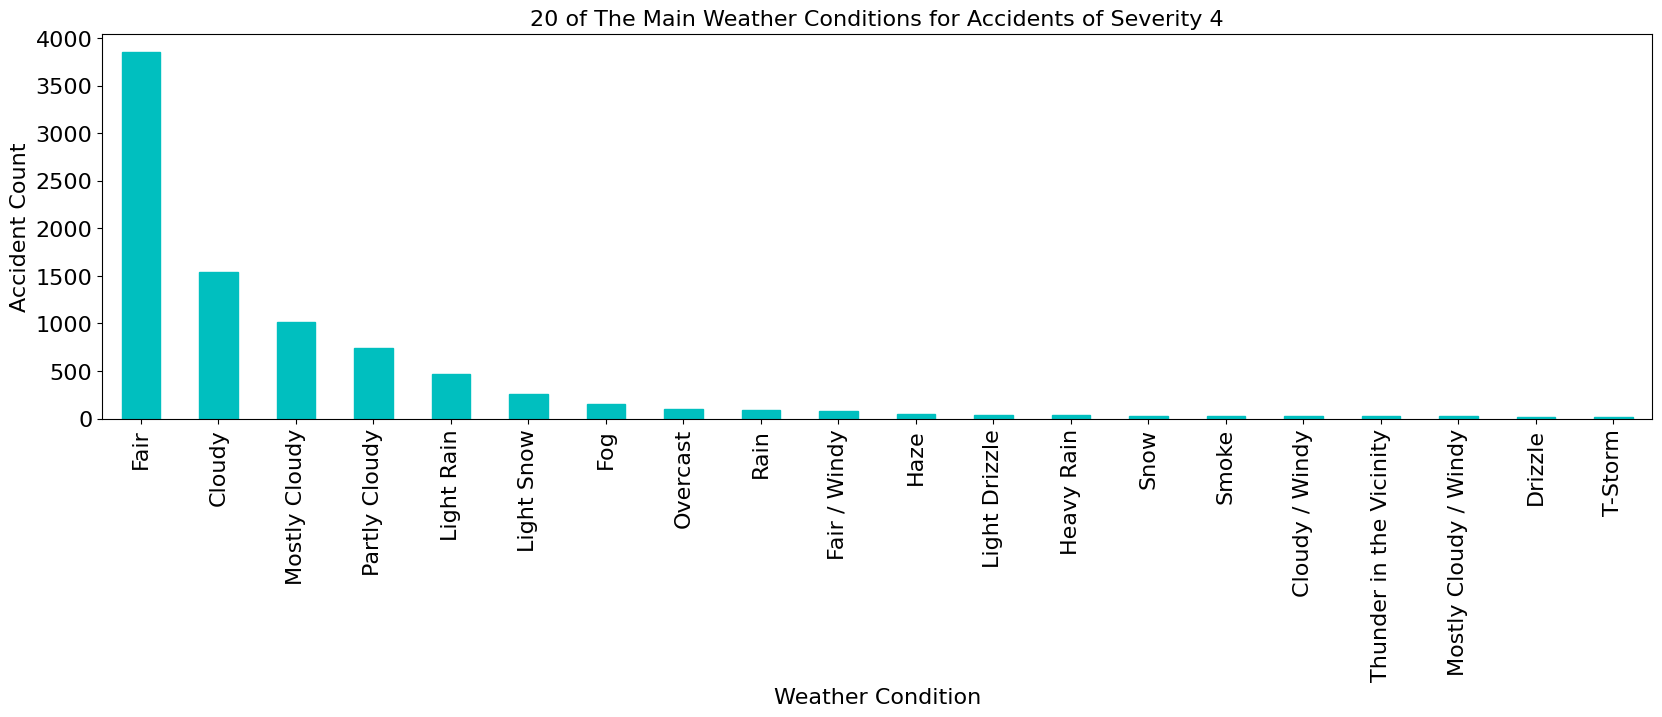

In [21]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='c',edgecolor='c',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

# Data Preprocessing


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282917 entries, 1786514 to 2482229
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     282917 non-null  object 
 1   Severity               282917 non-null  int64  
 2   Start_Time             282917 non-null  object 
 3   End_Time               282917 non-null  object 
 4   Start_Lat              282917 non-null  float64
 5   Start_Lng              282917 non-null  float64
 6   End_Lat                282917 non-null  float64
 7   End_Lng                282917 non-null  float64
 8   Distance(mi)           282917 non-null  float64
 9   Description            282917 non-null  object 
 10  Number                 282917 non-null  float64
 11  Street                 282917 non-null  object 
 12  Side                   282917 non-null  object 
 13  City                   282917 non-null  object 
 14  County                 282917

## Encoding

In [12]:
# Drop ID column
df.drop(columns = ['ID'], inplace = True)
df.drop(columns = ['Description'], inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282917 entries, 1786514 to 2482229
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               282917 non-null  int64  
 1   Start_Time             282917 non-null  object 
 2   End_Time               282917 non-null  object 
 3   Start_Lat              282917 non-null  float64
 4   Start_Lng              282917 non-null  float64
 5   End_Lat                282917 non-null  float64
 6   End_Lng                282917 non-null  float64
 7   Distance(mi)           282917 non-null  float64
 8   Number                 282917 non-null  float64
 9   Street                 282917 non-null  object 
 10  Side                   282917 non-null  object 
 11  City                   282917 non-null  object 
 12  County                 282917 non-null  object 
 13  State                  282917 non-null  object 
 14  Zipcode                282917

In [22]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [23]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [24]:
df.head(3)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1786514,2,62338,65424,28.257513,-81.436229,28.260315,-81.437122,0.201,1682.0,37323,...,0,0,0,0,0,0,0,0,0,0
1441159,2,196462,212716,30.499671,-91.141074,30.502041,-91.141152,0.164,5098.0,21574,...,0,0,0,0,1,0,1,1,1,1
472661,2,238799,261351,28.450381,-81.399122,28.449707,-81.401108,0.129,1631.0,45081,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282917 entries, 1786514 to 2482229
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               282917 non-null  int64  
 1   Start_Time             282917 non-null  int32  
 2   End_Time               282917 non-null  int32  
 3   Start_Lat              282917 non-null  float64
 4   Start_Lng              282917 non-null  float64
 5   End_Lat                282917 non-null  float64
 6   End_Lng                282917 non-null  float64
 7   Distance(mi)           282917 non-null  float64
 8   Number                 282917 non-null  float64
 9   Street                 282917 non-null  int32  
 10  Side                   282917 non-null  int32  
 11  City                   282917 non-null  int32  
 12  County                 282917 non-null  int32  
 13  State                  282917 non-null  int32  
 14  Zipcode                282917

## Feature importance

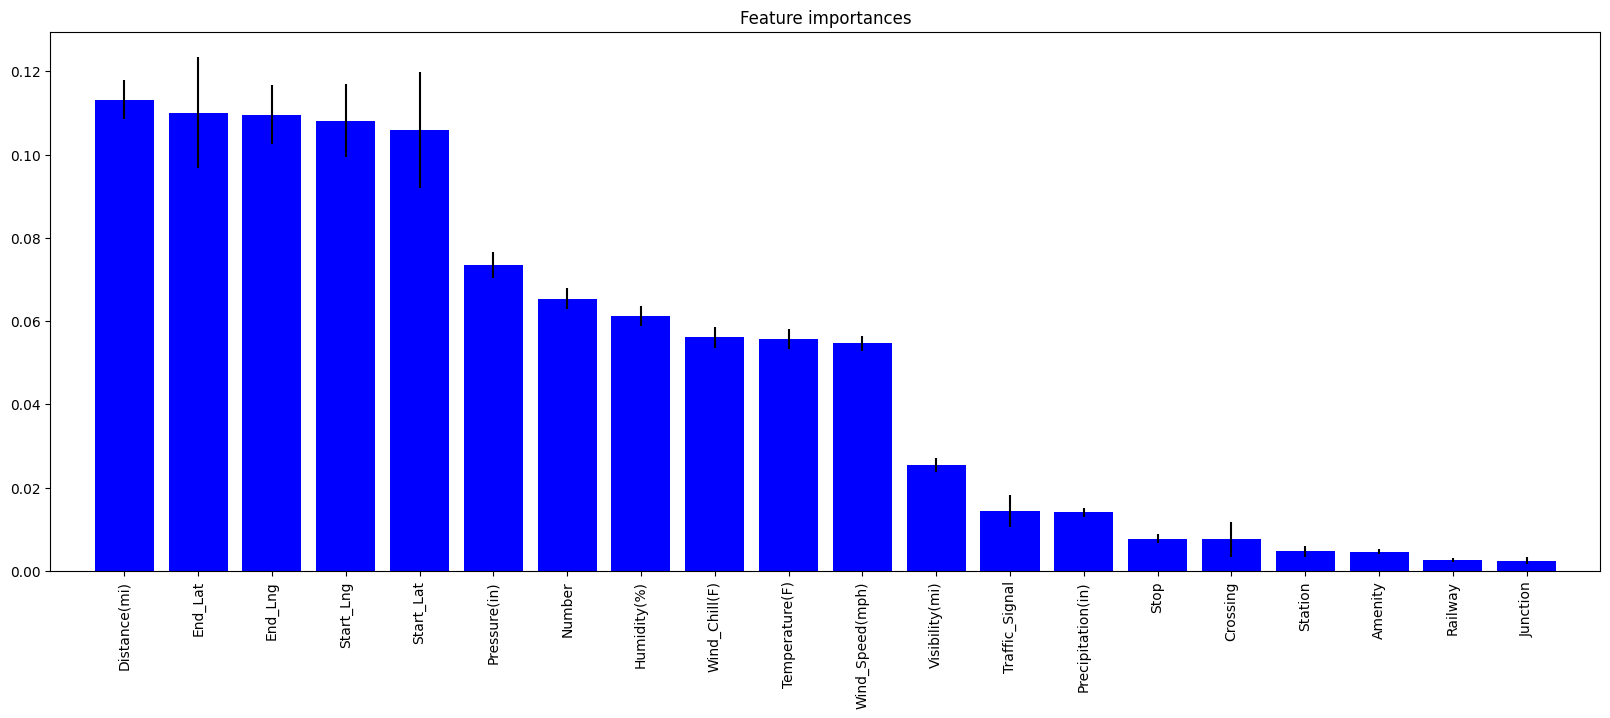

In [26]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

<h2>KNN</h2> 

### Train Test Split

In [27]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [28]:
y.unique()

array([2, 1, 4, 3], dtype=int64)

In [29]:
y = y-1

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.25,random_state=38,stratify=y)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [34]:
prediction_knn=knn.predict(X_test)

In [35]:
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 1 ... 1 1 1]


In [36]:
a=pd.DataFrame({'Actual values':Y_test,'Predicted values':prediction_knn})
a.head()

,Actual values,Predicted values
985864,1,1
1277005,1,1
1848412,1,1
442003,1,1
1245306,1,1


In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
matrix=confusion_matrix(Y_test,prediction_knn)

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       797
           1       0.96      0.99      0.98     66723
           2       0.48      0.29      0.36      1021
           3       0.56      0.21      0.30      2189

    accuracy                           0.95     70730
   macro avg       0.64      0.50      0.54     70730
weighted avg       0.94      0.95      0.94     70730



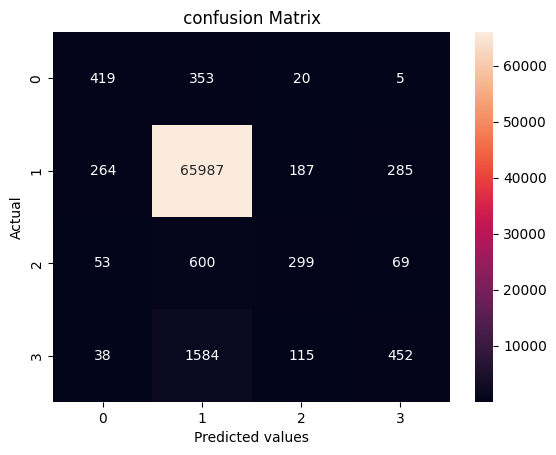

In [39]:
sns.heatmap(matrix,annot=True,fmt="d")
plt.title(' confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('Actual')
print(classification_report(Y_test,prediction_knn))